Lets check out Rita's LGal mocks

In [1]:
import numpy as np 
from astropy.io import fits
from astropy import units as U
from astropy import constants as Const
# -- desi--
import desispec.io as desiIO
# -- FOMOspec -- 
from FOMOspec import util as UT

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
f_name = 'gal_spectrum_253044_BGS_template_BC03_Stelib.fits'
f_inspec = ''.join([UT.dat_dir(), 'Lgal/templates/', f_name])
f_outspec = ''.join([UT.dat_dir(), 'Lgal/spectra/', 'desi_out_', f_name])

In [11]:
def SpecInput(galid): 
    f_name = 'gal_spectrum_'+str(galid)+'_BGS_template_BC03_Stelib.fits'
    f_inspec = ''.join([UT.dat_dir(), 'Lgal/templates/', f_name])
    specin = fits.open(f_inspec)[1].data
    output = {}
    output['wave'] = specin['wave']
    output['flux'] = specin['flux_dust_nonoise'] * 1e-4 * 1e7 *1e17
    output['flux_dust_nonoise'] = specin['flux_dust_nonoise'] * 1e-4 * 1e7 *1e17
    output['flux_nodust_nonoise'] = specin['flux_nodust_nonoise'] * 1e-4 * 1e7 *1e17
    zred = fits.open(f_inspec)[0].header['REDSHIFT']
    return output, zred

In [5]:
def SpecDESI(galid): 
    f_name = 'gal_spectrum_'+str(galid)+'_BGS_template_BC03_Stelib.fits'
    f_outspec = ''.join([UT.dat_dir(), 'Lgal/spectra/', 'desi_out_', f_name])
    return desiIO.read_spectra(f_outspec) #fits.open(f_outspec)[1].data

Text(0,0.5,'flux [$W/\\AA$]')

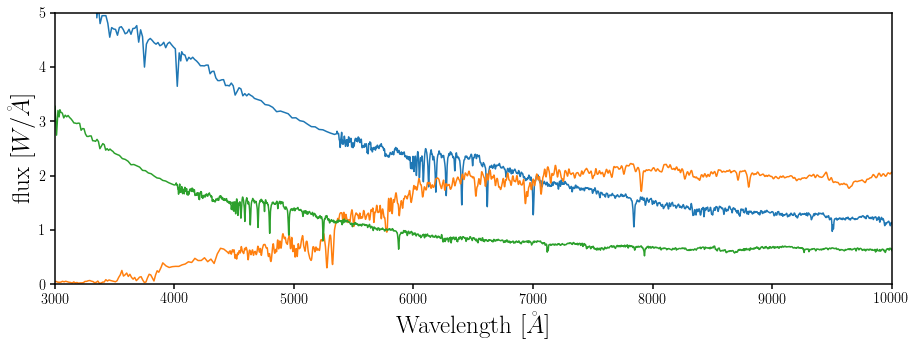

In [12]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
for idd in [101314, 253044, 10924]: 
    spec_in, _ = SpecInput(idd)
    sub.plot(spec_in['wave'], spec_in['flux_dust_nonoise'])
sub.set_xlim([3e3, 1e4])
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_ylim([0., 5])
sub.set_ylabel('flux [$W/\AA$]', fontsize=25)

Text(0,0.5,'flux [$W/\\AA$]')

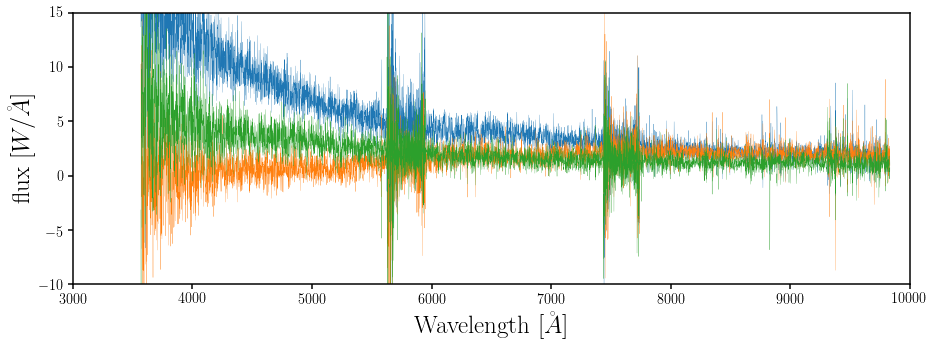

In [7]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
for ii, idd in enumerate([101314, 253044, 10924]): 
    spec_out = SpecDESI(idd)

    for iband, band in enumerate(['b', 'r', 'z']): 
        sub.plot(spec_out.wave[band], spec_out.flux[band][0], c='C'+str(ii), lw=0.25)
sub.set_xlim([3e3, 1e4])
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_ylim([-10., 15.])
sub.set_ylabel('flux [$W/\AA$]', fontsize=25)

Text(0,0.5,'flux [$W/\\AA$]')

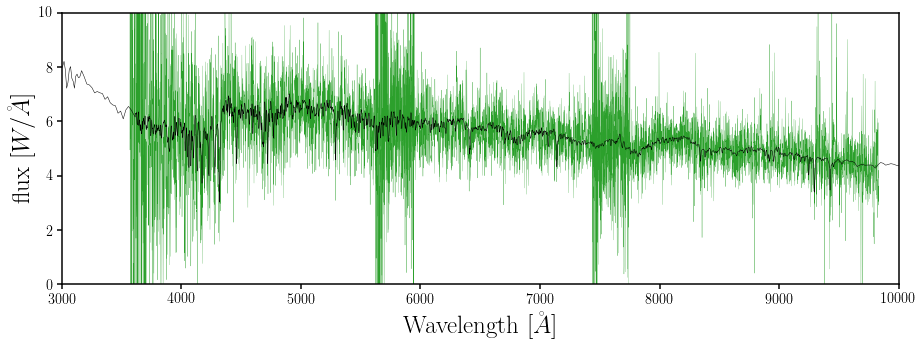

In [28]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
for idd in [1]:#10924]: #253044]:#
    spec_out = SpecDESI(idd)
    for iband, band in enumerate(['b', 'r', 'z']): 
        sub.plot(spec_out.wave[band], spec_out.flux[band][0], c='C'+str(ii), lw=0.25)
    spec_in, z_in = SpecInput(idd)
    sub.plot(spec_in['wave'], spec_in['flux_nodust_nonoise'], c='k', lw=0.5)
sub.set_xlim([3e3, 1e4])
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_ylim([0., 10])
sub.set_ylabel('flux [$W/\AA$]', fontsize=25)